In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Spam_DFN = pd.read_csv("C:/Users/Vaibhav Banga/Downloads/emails_V2.csv")

In [3]:
Spam_DFN.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


In [10]:
Spam_DF = Spam_DFN
Spam_DF.dropna(inplace = True)
Spam_DF.tail()

,text,spam
2038,Subject: the installation of the equipment you...,0.0
2039,Subject: all about current and near future gas...,0.0
2040,Subject: maureen ' s expenses it appears that...,0.0
2041,Subject: interview - numerical methods & finan...,0.0
2042,"Subject: sevil yaman hi norma , sevil ' s pr...",0.0


# EDA - EXPLORATORY  DATA   ANALYSIS

In [13]:
Spam_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2042
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    2043 non-null   object 
 1   spam    2043 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.9+ KB


In [14]:
Spam_DF.describe()

,spam
count,2043.000000
mean,0.669604
std,0.470471
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [20]:
Spam = Spam_DF[Spam_DF['spam']==1]
Spam.shape[0]

1368

In [18]:
Ham = Spam_DF[Spam_DF['spam']==0]
Ham.shape

(675, 2)

In [24]:
(Spam.shape[0])/(Spam.shape[0]+Ham.shape[0])*100

66.96035242290749

In [25]:
(Ham.shape[0])/(Spam.shape[0]+Ham.shape[0])*100

33.03964757709251

# VISUALIZATION 

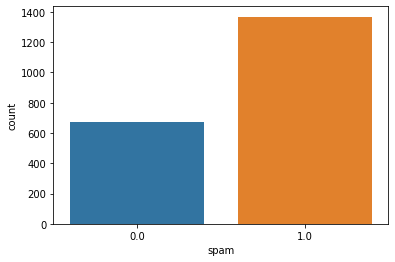

In [26]:
sns.countplot(Spam_DF['spam'])

# DATA CLEANING


In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [70]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('English')

[nltk_data] Downloading package stopwords to C:\Users\Vaibhav
[nltk_data]     Banga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [91]:
def message_clearing(text):
    A = [i for i in text if i no t in string.punctuation]
    A_join = ''.join(A)
    B = [j for j in A_join.split() if j.lower() not in stopwords.words('English')]
    return B

In [93]:
Spam_DF['text'].apply(message_clearing)

0       [Subject, naturally, irresistible, corporate, ...
1       [Subject, stock, trading, gunslinger, fanny, m...
2       [Subject, unbelievable, new, homes, made, easy...
3       [Subject, 4, color, printing, special, request...
4       [Subject, money, get, software, cds, software,...
                              ...                        
2038    [Subject, installation, equipment, ordered, co...
2039    [Subject, current, near, future, gas, power, m...
2040    [Subject, maureen, expenses, appears, administ...
2041    [Subject, interview, numerical, methods, finan...
2042    [Subject, sevil, yaman, hi, norma, sevil, prim...
Name: text, Length: 2043, dtype: object

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
vm = CountVectorizer(analyzer = message_clearing)

In [108]:
Spam_df_clean = vm.fit_transform(Spam_DF['text'])

In [109]:
print(vm.get_feature_names())

['\x01', '\x0f', '\x10', '\x12', '\x14', '\x15', '0', '00', '000', '0000', '000000', '00000000', '0000000000', '000000000005820', '000000000007876', '000000000011185', '000000000013085', '000000000025307', '000000000025312', '0000102789', '0000104281', '0000104282', '0000108729', '000066', '0001', '0002', '0003', '0004', '0005', '0006', '00076', '0009249480', '0009249481', '0009249504', '0009249505', '0009249506', '001', '0011', '00193', '002', '00225', '0029', '003', '0031', '003399', '00343938', '0044', '005', '0052', '006', '0061', '007', '0080', '00971', '01', '010', '0100', '01019', '0107', '01075', '0109', '011', '0115', '01210', '0141', '015', '01500', '0160', '0171', '017201846', '01890', '0190', '02', '020', '0200', '020130', '0207', '0208', '021', '02138', '022', '023154', '025', '02539', '026', '028', '03', '0300', '0305', '0308', '0311', '0315', '032', '0330', '03302', '0363', '0367826', '0390', '0396', '04', '040', '0400', '0408', '0413', '043', '044', '046', '0489', '05',

In [100]:
Spam_df_clean.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [110]:
Spam_df_clean.shape

(2043, 24606)

# MODELLING


In [113]:
X = Spam_df_clean
y = Spam_DF[['spam']]

In [114]:
X.shape

(2043, 24606)

In [115]:
y.shape

(2043, 1)

Splitting of Data

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 102)

In [119]:
X_train.shape

(1430, 24606)

In [120]:
X_test.shape

(613, 24606)

In [122]:
y_train.shape

(1430, 1)

In [123]:
y_test.shape

(613, 1)

Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state = 0)

In [132]:
lm.fit(X_train,y_train)

C:\Users\Vaibhav Banga\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
y_pred = lm.predict(X_test)

In [134]:
y_test

,spam
870,1.0
2020,0.0
12,1.0
670,1.0
1730,0.0
...,...
568,1.0
1579,0.0
1686,0.0
1532,0.0


In [135]:
y_pred

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0.

In [136]:
lm.score(X_test,y_pred)

1.0